# Imports

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


# Load dataset

In [111]:

df = pd.read_csv('accent-mfcc-data-1.csv')

df.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


# Drop target from dataset

In [112]:
X = df.drop(['language'], axis=1)

y = df["language"]

# Split dataset

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Decision Tree

#### Default

In [114]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.5688073394495413


#### Entropy

0.6788990825688074


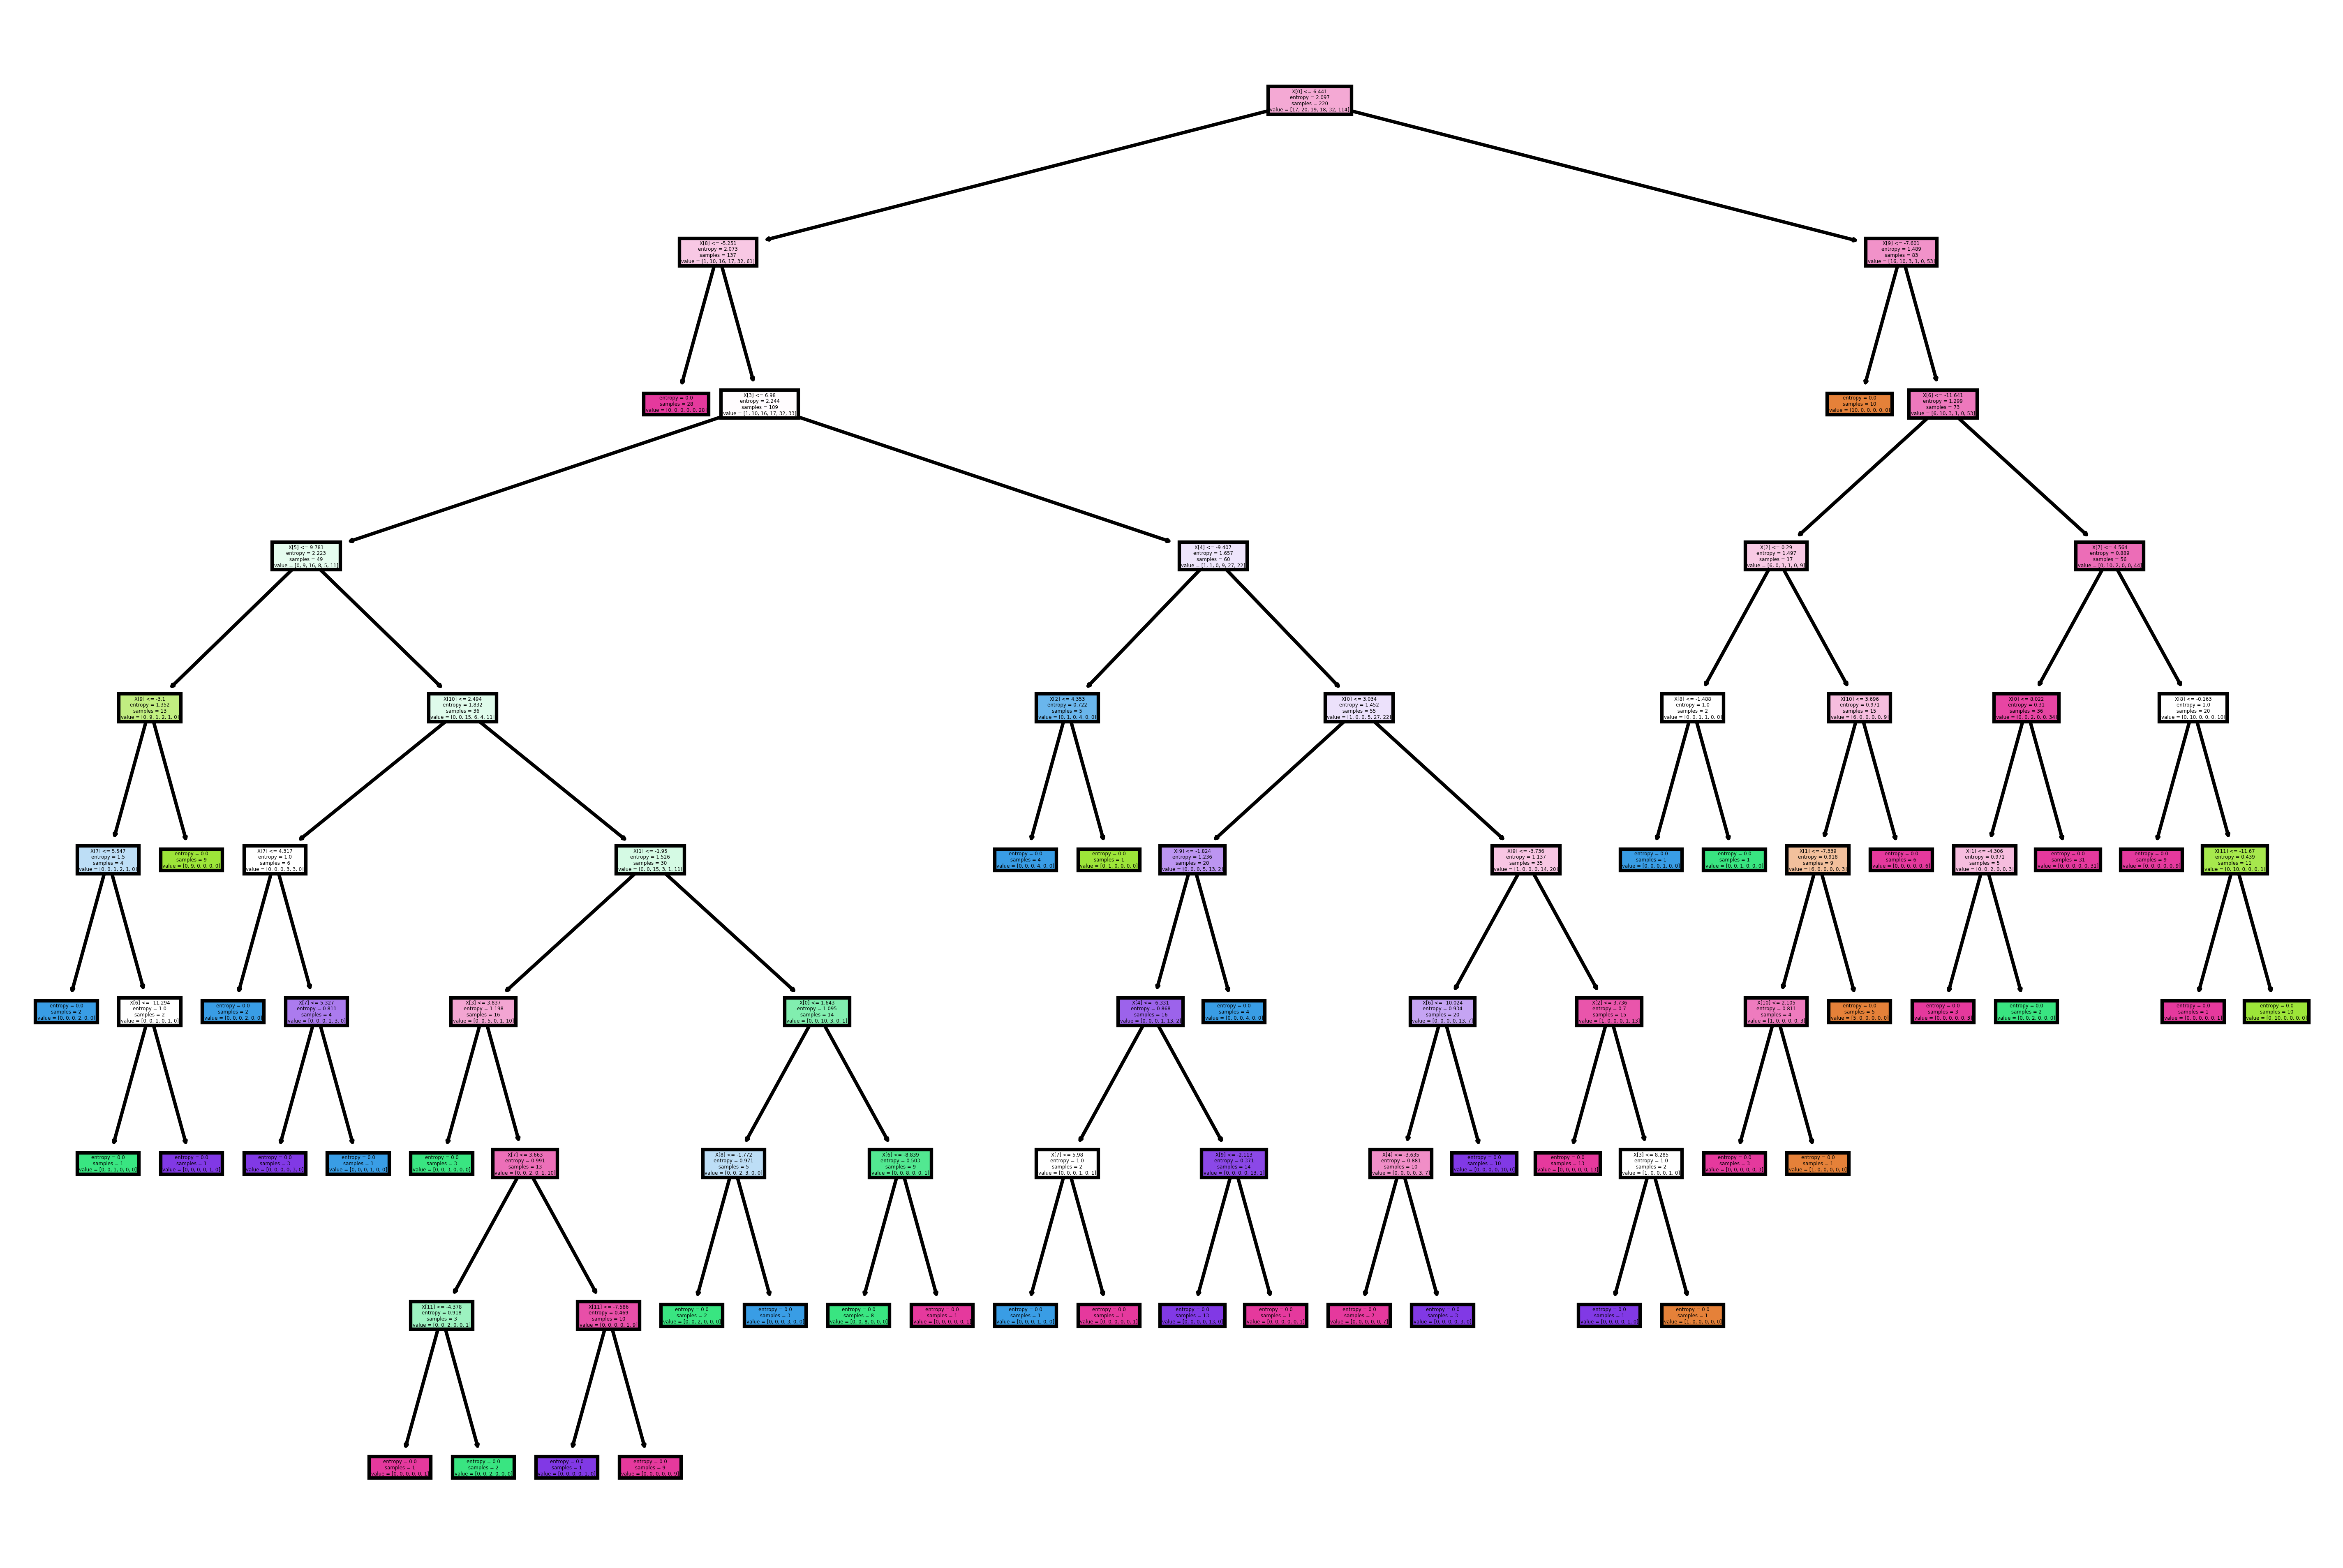

In [115]:
dtc = DecisionTreeClassifier(criterion="entropy")

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize=(12, 8), dpi=600)

plot_tree(dtc, filled=True)

plt.show()


#### Other hyperparams

In [116]:
dtc = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=8, min_samples_split=4)

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.7155963302752294


Tried a bunch of different hyperparams. Messed with splitter, max_depth, and min_samples_split. Didn't see appreciable imporvement over jsut setting the criterion to entropy 

# Random Forest

#### Default

In [117]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.7431192660550459


#### Entropy

In [118]:
rfc = RandomForestClassifier(criterion="entropy")

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.7431192660550459


#### Other hyperparams

In [119]:
rfc = RandomForestClassifier(criterion="entropy", max_depth=4, min_samples_split=4, n_jobs=-1)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.6330275229357798


Sometimes the entropy model will predict much better, other times it's hardly better. Like the dtc messing with hyper params didn't make good imporvements.

# SVC

#### Default

In [120]:
svc = SVC()

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.5229357798165137


#### C

0.8440366972477065


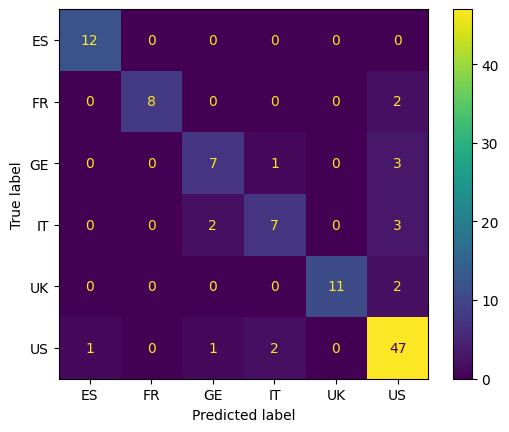

In [121]:
svc = SVC(C=15.0)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_pred=y_pred, y_true=y_test)


Incredible increase in acc! I didn't find a difinivite best value for C, but it increased SVM from being basically useless to the best results yet!

#### Other hyperparams

In [122]:
svc = SVC(C=15.0, kernel='poly', degree=7, gamma='auto')

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.8073394495412844


No improvement with the other SVC hps

# KKN

#### Default

In [123]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.7798165137614679


In [124]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.7798165137614679


0.8073394495412844


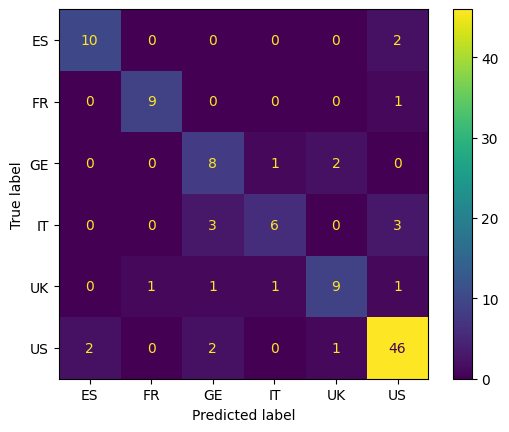

In [125]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_pred=y_pred, y_true=y_test)


In [126]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=30, p=2)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.8073394495412844


setting weight to distance had a small improvement

# Naive Bayes


#### Default

0.5779816513761468


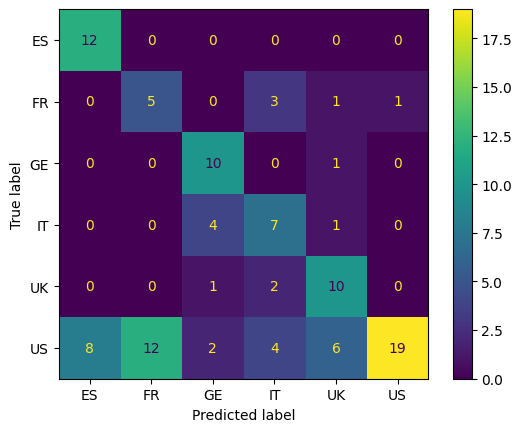

In [127]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_pred=y_pred, y_true=y_test)


# Boosting

In [128]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

In [129]:
xbc = XGBClassifier()

y_train_int = []
for x in y_train:
    if (x == 'ES'):
        y_train_int.append(0)
    if (x == 'FR'):
        y_train_int.append(1)
    if (x == 'GE'):
        y_train_int.append(2)
    if (x == 'IT'):
        y_train_int.append(3)
    if (x == 'UK'):
        y_train_int.append(4)
    if (x == 'US'):
        y_train_int.append(5)

xbc.fit(X_train, y_train_int)

y_pred_int = xbc.predict(X_test)

y_pred_x = []
for x in y_pred_int:
    if (x == 0):
        y_pred_x.append('ES')
    if (x == 1):
        y_pred_x.append('FR')
    if (x == 2):
        y_pred_x.append('GE')
    if (x == 3):
        y_pred_x.append('IT')
    if (x == 4):
        y_pred_x.append('UK')
    if (x == 5):
        y_pred_x.append('US')

print(metrics.accuracy_score(y_test, y_pred_x))


0.7431192660550459


In [130]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

y_pred_g = gbc.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred_g))

0.6788990825688074


In [131]:
cbc = CatBoostClassifier()

cbc.fit(X_train, y_train)

y_pred_c = cbc.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred_c))

Learning rate set to 0.073246
0:	learn: 1.7406465	total: 3.16ms	remaining: 3.16s
1:	learn: 1.6826723	total: 5.99ms	remaining: 2.99s
2:	learn: 1.6383362	total: 8.7ms	remaining: 2.89s
3:	learn: 1.5904554	total: 11.6ms	remaining: 2.89s
4:	learn: 1.5442704	total: 14.9ms	remaining: 2.96s
5:	learn: 1.5015445	total: 17.8ms	remaining: 2.94s
6:	learn: 1.4652588	total: 21.1ms	remaining: 2.99s
7:	learn: 1.4279433	total: 24.6ms	remaining: 3.05s
8:	learn: 1.3874590	total: 27.9ms	remaining: 3.07s
9:	learn: 1.3534082	total: 31.5ms	remaining: 3.12s
10:	learn: 1.3204791	total: 35.2ms	remaining: 3.17s
11:	learn: 1.2912053	total: 38.1ms	remaining: 3.14s
12:	learn: 1.2704641	total: 41ms	remaining: 3.11s
13:	learn: 1.2433651	total: 43.6ms	remaining: 3.07s
14:	learn: 1.2224440	total: 46ms	remaining: 3.02s
15:	learn: 1.1985978	total: 48.4ms	remaining: 2.98s
16:	learn: 1.1754296	total: 50.7ms	remaining: 2.93s
17:	learn: 1.1550086	total: 53ms	remaining: 2.89s
18:	learn: 1.1315756	total: 55.2ms	remaining: 2.85s

Had issues trying to install lightgbm

In [132]:
# xbc, gbc, cbc VOTING
most_common_list = []
i = 0
for x in y_test:
    values = [x, y_pred_x[i], y_pred_c[i][0], y_pred_g[i]]
    most_common = max(set(values), key=values.count)
    most_common_list.append(most_common)
    i += 1
print(metrics.accuracy_score(y_test, most_common_list))

0.7981651376146789


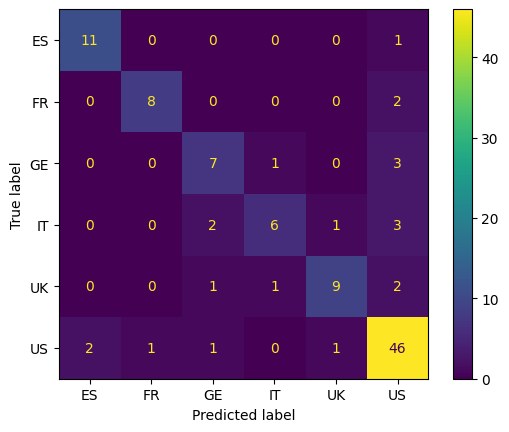

In [133]:
ConfusionMatrixDisplay.from_predictions(y_pred=most_common_list, y_true=y_test)
